# **Assignment 2 Data Science Tools and Techniques**

# **Umair Ahmad       21i-2081**

# **Execution Instructions**

1. Download the Dataset from [Here](https://archive.ics.uci.edu/ml/datasets/Census+Income)

2. Provide the file path in the **Data reading section**

3. Excute each cell by shit+enter



---



# **Introduction**

* The main aim of this project is to implement and compare different learning model

* In this Assignment, we are provided with structured dataset of **Census Income Data Set** provided by UCI

* The task is to trained model on the given dataset using Machine Learning algorithm

* The problem of 'Income Prediction' is treated as a classification and supervised learning problem

---



# **Problem Implementation**

Here detailed implementation of 'Income Prediction' problem

Task Learn Input-Ouput Function Given a features as an input and predict its price(output)

**Goal:** To learn from input to predict output

Input-Output: Input: 15 feature (numeric and categorical), gathered from house of America. Output: Income Prediction

---



# **Phases of Machine Learning:**

 **Training:**

* Learning phase Subset of data (Train data) is used to train model. 

**Testing:**

* Subset of data is used to evaluate test trained model. 



---



# **Phases 1 and 2: Training and Testing The following**

sequence of seven steps are followed in these two phases: Step 

* Step 1: Import Libraries

* Step 2: Read, Understand and Pre-process Train/Test Data

* Step 2.1: Read Data

* Step 2.2: Understand Data

* Step 2.3: Pre-process Data

* Step 3: Label Encoding for Train/Test Data

* Step 4: Scaling and removal of corelated features

* Step 5: Splitting Input vectors and labels

* Step 6: Train Machine Learning Algorithms using Training Data

* Step 7: Evaluate Machine Learning Algorithms using Test Data

* Step 8: Visualization and compression with original and predicted data

* Step 9 Train Neural Network using Training and validation Data

* Step 10: Visualization and compression with original and predicted data

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch as torch
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from itertools import chain
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Reading Training and Testing Data**

In [ ]:
df= pd.read_csv('/content/adult.csv')
test_df=pd.read_csv('/content/test_adults.csv')

In [ ]:
df.shape

(32561, 15)

In [ ]:
test_df.shape

(16281, 16)

In [ ]:
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
frames = [df, test_df]
df = pd.concat(frames)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,education-num,marital-status,capital-gain,capital-loss,hours-per-week,native-country
0,90,?,77053,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN
1,82,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN
2,66,?,186061,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN
3,54,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,NaN,NaN,Prof-specialty,Not-in-family,White,Female,NaN,NaN,NaN,NaN,<=50K.,13.0,Divorced,0.0,0.0,36.0,United-States
16277,64,?,321403,HS-grad,NaN,NaN,?,Other-relative,Black,Male,NaN,NaN,NaN,NaN,<=50K.,9.0,Widowed,0.0,0.0,40.0,United-States
16278,38,Private,374983,Bachelors,NaN,NaN,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,NaN,<=50K.,13.0,Married-civ-spouse,0.0,0.0,50.0,United-States
16279,44,Private,83891,Bachelors,NaN,NaN,Adm-clerical,Own-child,Asian-Pac-Islander,Male,NaN,NaN,NaN,NaN,<=50K.,13.0,Divorced,5455.0,0.0,40.0,United-States


In [ ]:
#Mapping binary values to the expected output

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
#Replacing question marks in dataset with null values

df.replace('?',np.nan )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
#Finding what percentage of data is missing from the dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
income,0,0.0
native.country,0,0.0
hours.per.week,0,0.0
capital.loss,0,0.0
capital.gain,0,0.0


In [ ]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column

df['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [ ]:
#Since mode is Prof-specialty, replacing null values with it

df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [ ]:
df['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [ ]:
#Since mode is Private, replacing null values with it

df['workclass'] = df['workclass'].fillna('Private')

In [ ]:
df['native.country'].describe()

count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object

In [ ]:
#Since mode is United-States, replacing null values with it

df['native.country'] = df['native.country'].fillna('United-States')

In [ ]:
#Mean, Median, Minimum , Maximum values etc can be found

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94b55ac190>,
      dtype=object)

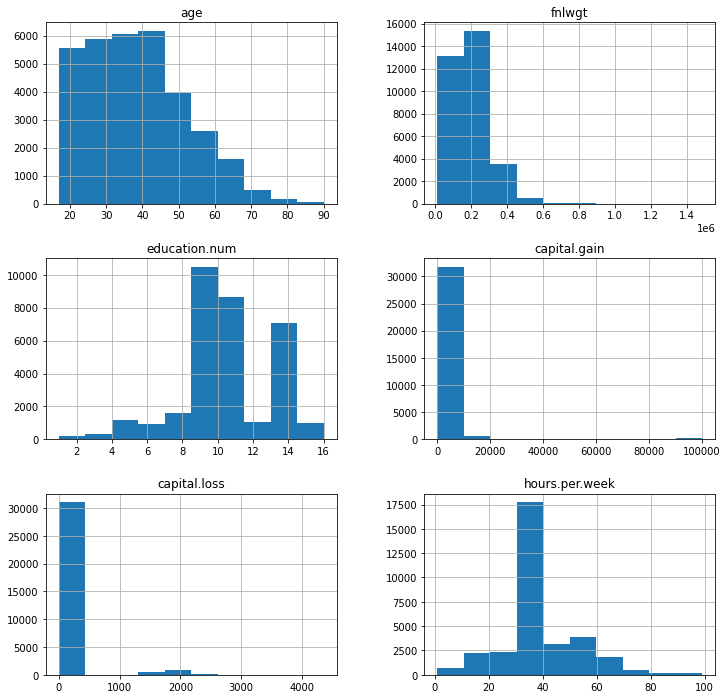

In [ ]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

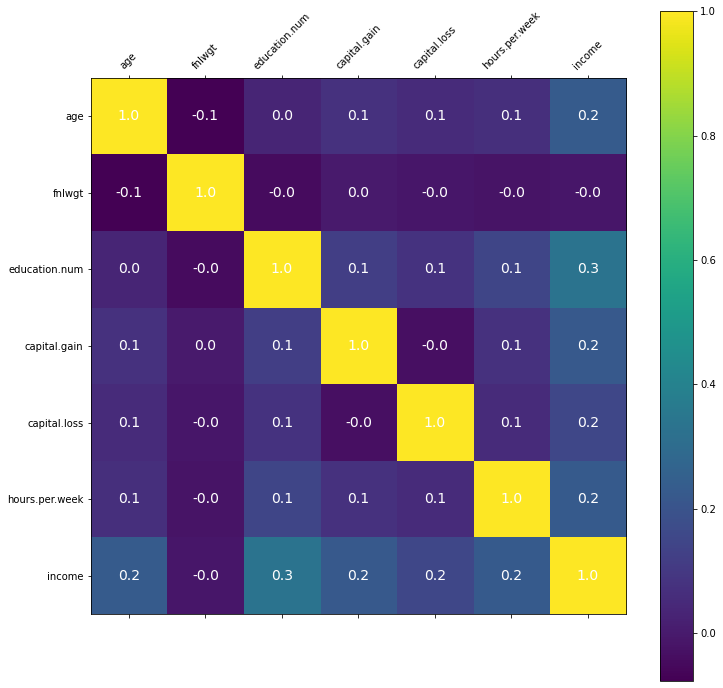

In [ ]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [ ]:
#Since it has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
dataset=df.copy()

In [ ]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

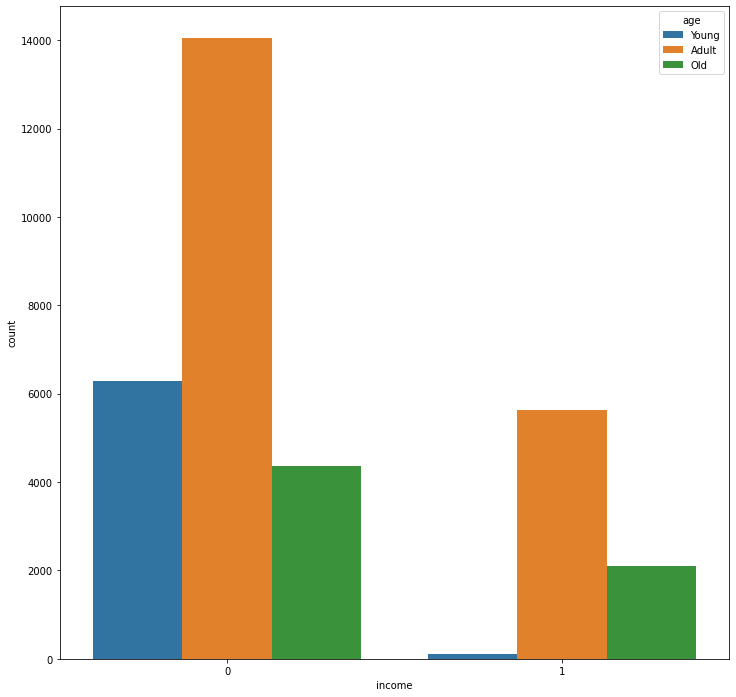

In [ ]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

In [ ]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['capital.gain'] - dataset['capital.loss']
dataset.drop(['capital.gain'], axis = 1, inplace = True)
dataset.drop(['capital.loss'], axis = 1, inplace = True)

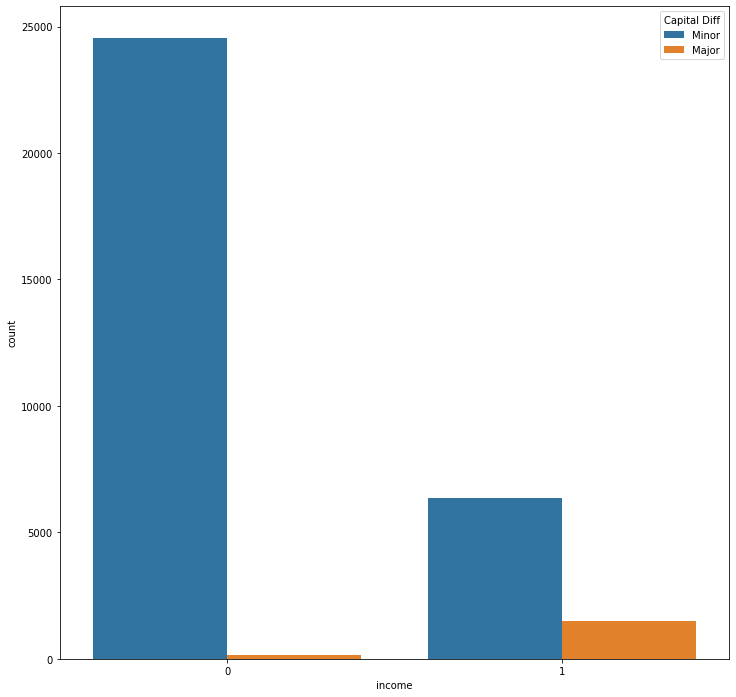

In [ ]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [ ]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

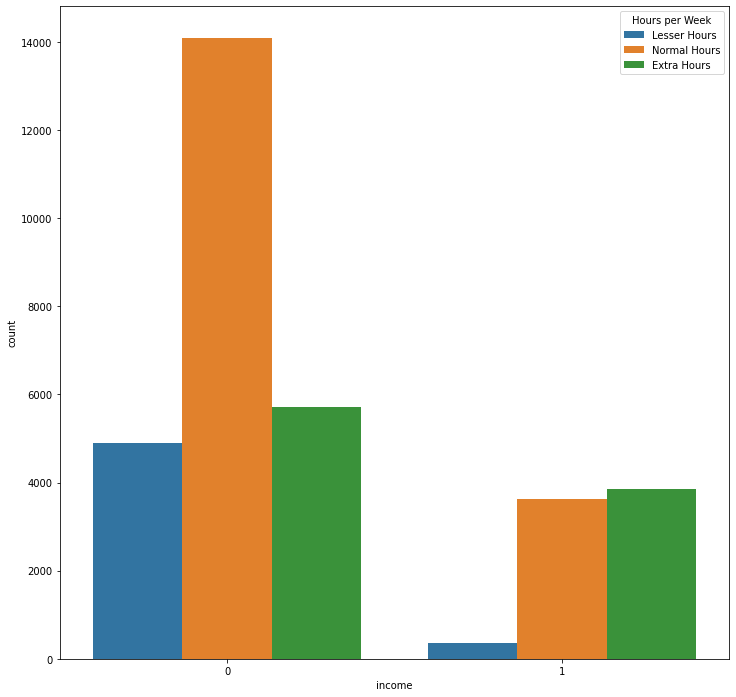

In [ ]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)


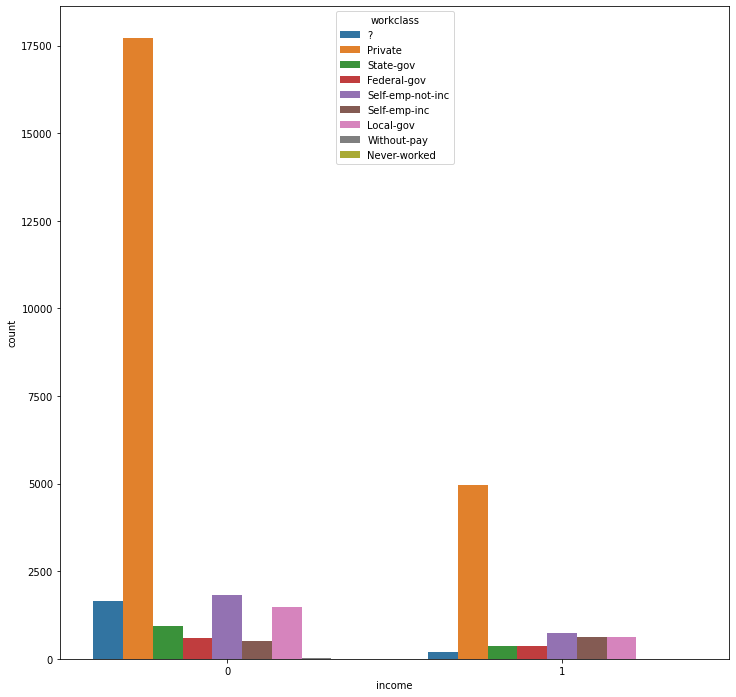

In [ ]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = dataset)

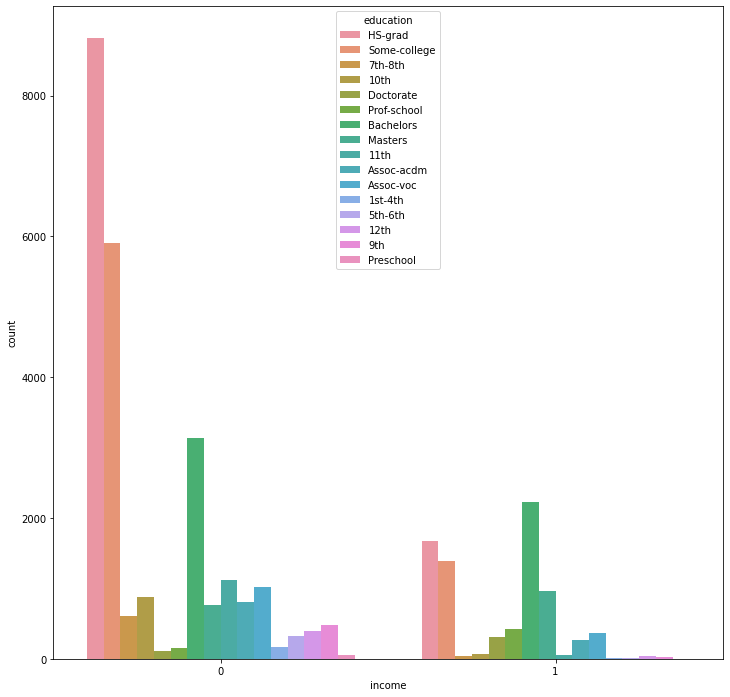

In [ ]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = dataset)

In [ ]:
df.drop(['education.num'], axis = 1, inplace = True)

In [ ]:
#Combining the lower grades of education together


df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)



df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

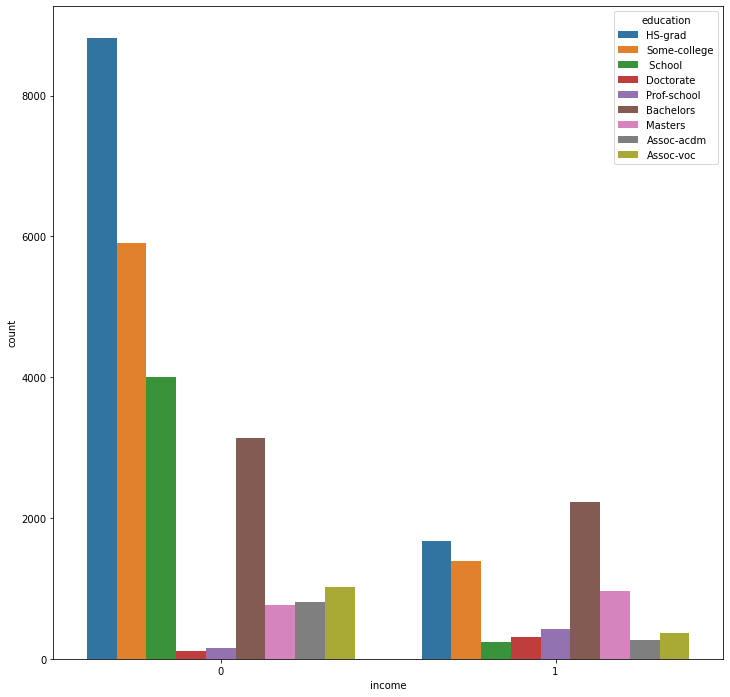

In [ ]:
sns.countplot(x = 'income', hue = 'education', data = df)

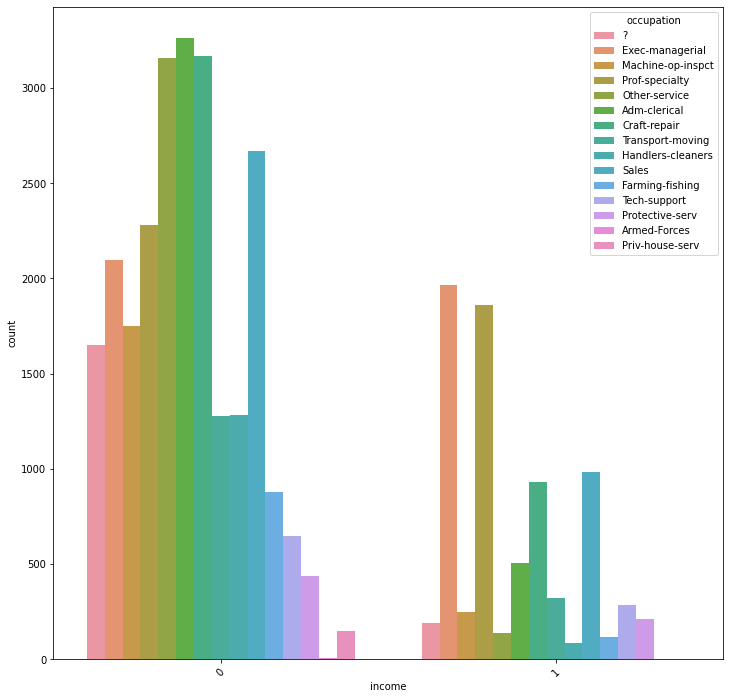

In [ ]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

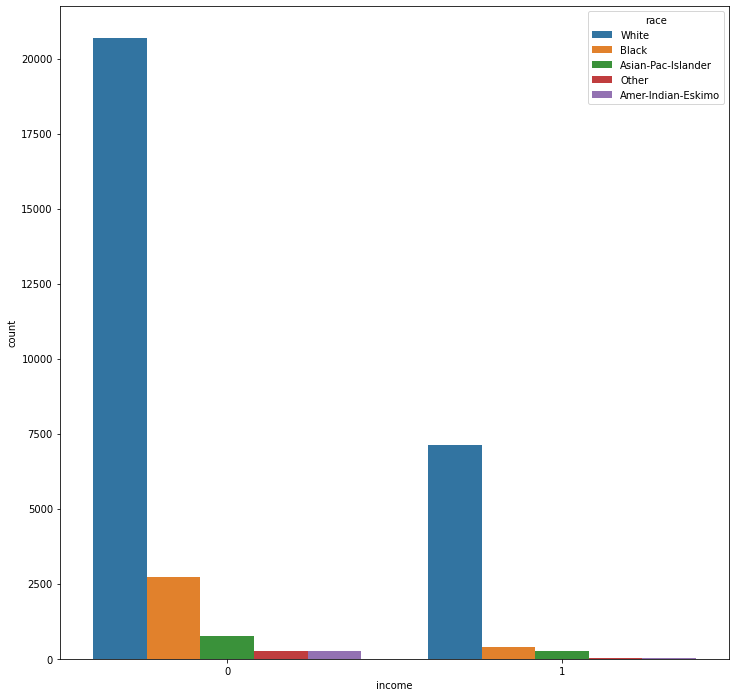

In [ ]:
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [ ]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

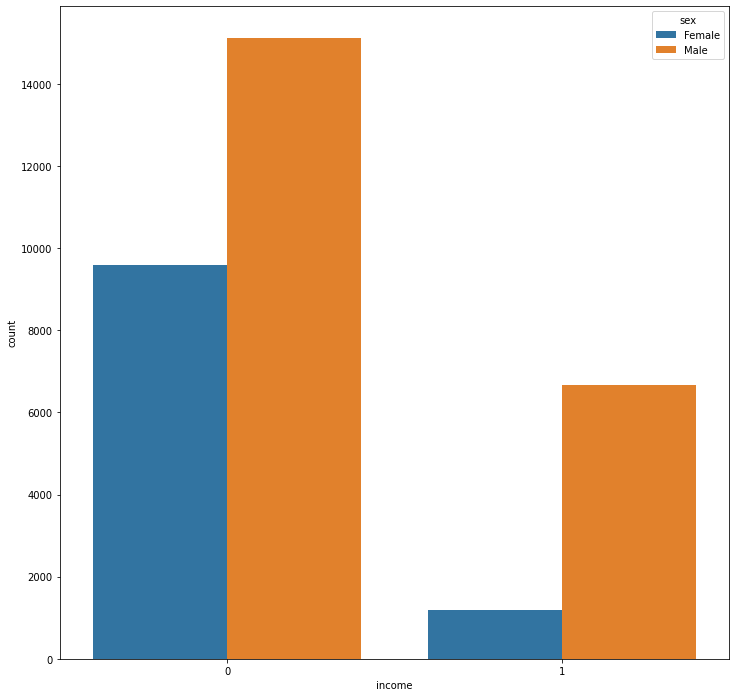

In [ ]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'sex', data = dataset)

In [ ]:
count = dataset['native.country'].value_counts()
count

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Text(0.5, 1.0, 'Count from each Country')

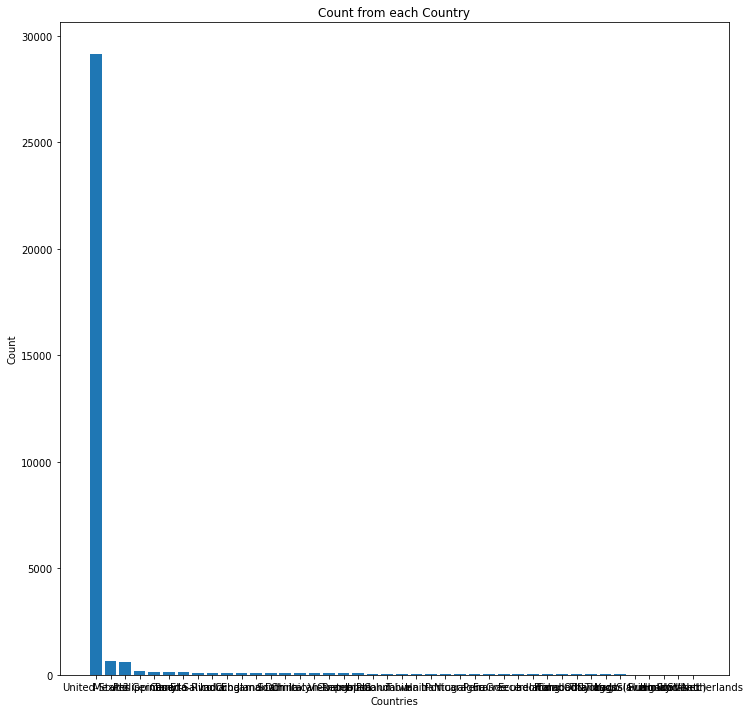

In [ ]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [ ]:
#Combining all other into one class

countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [ ]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

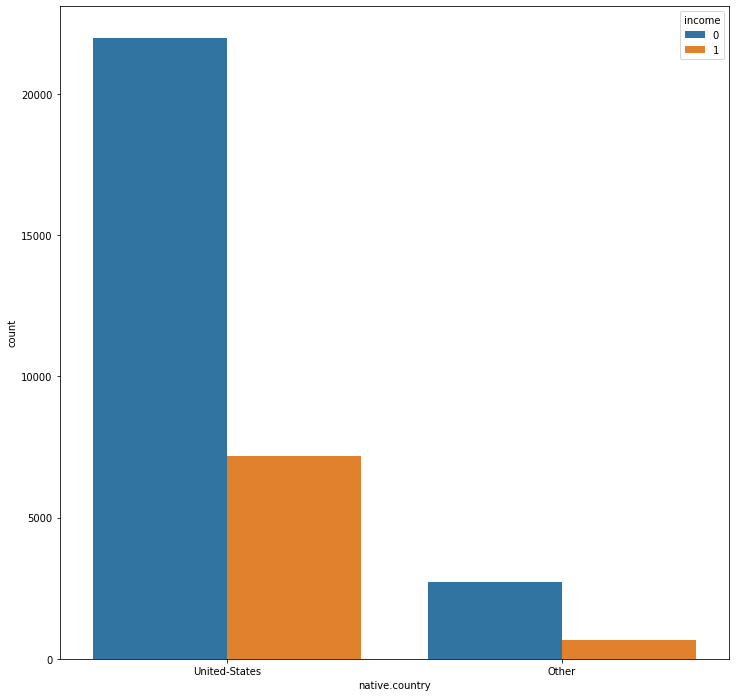

In [ ]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)

In [ ]:
#Splitting the data set into features and outcome

X = df.drop(['income'], axis=1)
Y = df['income']

In [ ]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,Some-college,Widowed,?,Unmarried,Other,Female,0,4356,40,United-States
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [ ]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


In [ ]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
X_train.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.177807,0.088108,1.348345,-0.407250,1.289114,-0.898177,0.413855,0.698654,-0.144749,-0.21852,0.851632,0.342235
1,-0.993245,-1.282465,-0.581249,0.924081,-0.841538,0.971835,0.413855,0.698654,-0.144749,-0.21852,-1.254868,0.342235
2,-0.993245,0.088108,0.190589,0.924081,-1.315016,1.595172,-2.416307,-1.431324,-0.144749,-0.21852,-0.039580,0.342235
3,1.056095,0.088108,0.190589,2.255412,0.105418,-0.274840,0.413855,-1.431324,-0.144749,-0.21852,-0.039580,0.342235
4,-1.066435,0.088108,-0.581249,0.924081,-0.368060,0.971835,0.413855,-1.431324,-0.144749,-0.21852,-0.039580,0.342235



# **Training on differnet models**
---



# **Training On Random Forest**

In [ ]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

# **Accuracy of Random Forest**

In [ ]:
print('accuracy score:', acc_random_forest)

accuracy score: 85.24


# **Classification Report**


In [ ]:
# Random Forest report and analysis
from sklearn import metrics

print(metrics.classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4966
           1       0.73      0.61      0.66      1547

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



# **Prediction Results**

Text(0.5, 1.0, 'First 200 actual and Predicted values')

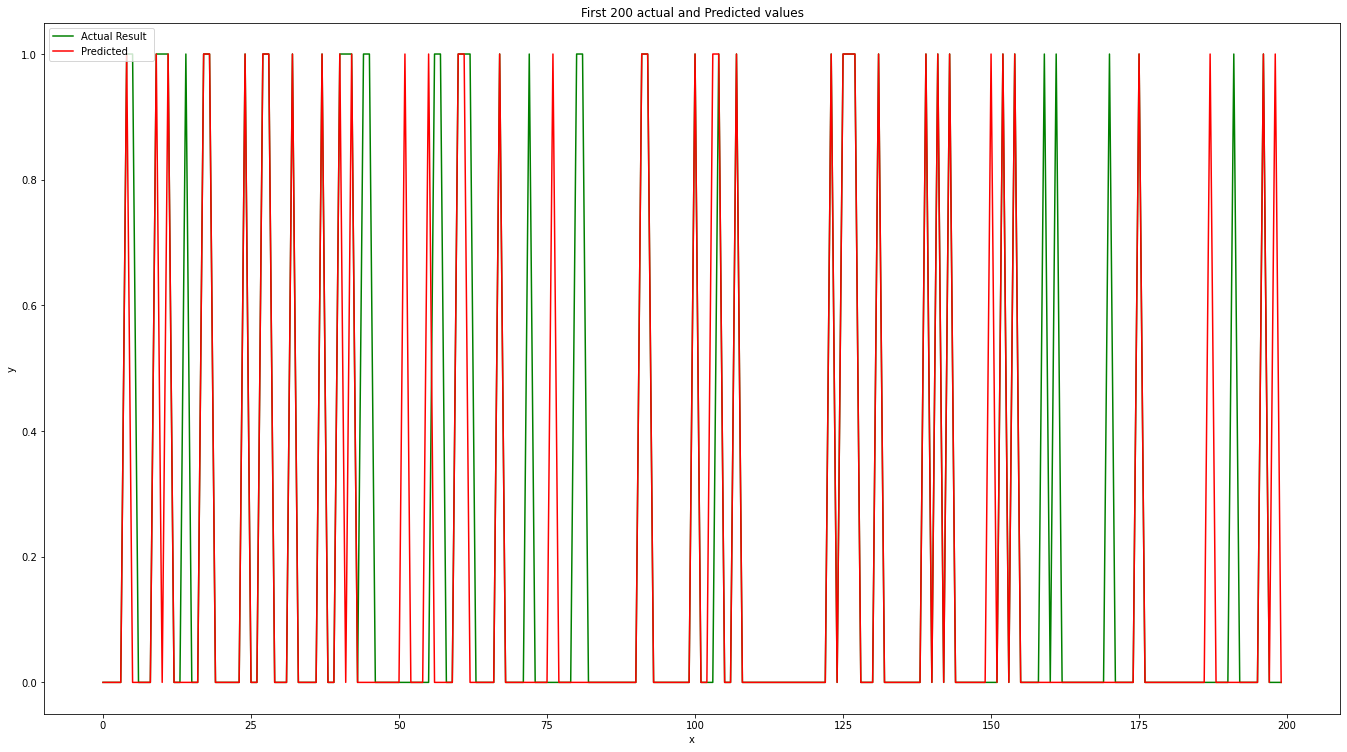

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(200),Y_test[0:200],'g', label="Actual Result ")
axes.plot( np.arange(200),Y_prediction[0:200],'r', label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 200 actual and Predicted values')

# **Neural Network Implementation**

In [ ]:

## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(Y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

16281


In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=2)

In [ ]:

class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 13.
        self.layer_1 = nn.Linear(13, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

BinaryClassification(
  (layer_1): Linear(in_features=13, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_testt):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_testt).sum().float()
    acc = correct_results_sum/y_testt.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, 300):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.56042 | Acc: 70.411
Epoch 002: | Loss: 0.41977 | Acc: 79.528
Epoch 003: | Loss: 0.39801 | Acc: 80.482
Epoch 004: | Loss: 0.38738 | Acc: 80.963
Epoch 005: | Loss: 0.37903 | Acc: 81.294
Epoch 006: | Loss: 0.37473 | Acc: 81.604
Epoch 007: | Loss: 0.37000 | Acc: 81.847
Epoch 008: | Loss: 0.36748 | Acc: 82.012
Epoch 009: | Loss: 0.36593 | Acc: 82.310
Epoch 010: | Loss: 0.36221 | Acc: 82.350
Epoch 011: | Loss: 0.36005 | Acc: 82.506
Epoch 012: | Loss: 0.35801 | Acc: 82.601
Epoch 013: | Loss: 0.35454 | Acc: 82.801
Epoch 014: | Loss: 0.35309 | Acc: 82.890
Epoch 015: | Loss: 0.35183 | Acc: 83.037
Epoch 016: | Loss: 0.35039 | Acc: 83.120
Epoch 017: | Loss: 0.35016 | Acc: 83.221
Epoch 018: | Loss: 0.34768 | Acc: 83.291
Epoch 019: | Loss: 0.34608 | Acc: 83.402
Epoch 020: | Loss: 0.34491 | Acc: 83.512
Epoch 021: | Loss: 0.34427 | Acc: 83.491
Epoch 022: | Loss: 0.34435 | Acc: 83.518
Epoch 023: | Loss: 0.34362 | Acc: 83.626
Epoch 024: | Loss: 0.34322 | Acc: 83.528
Epoch 025: | Los

# **Saving model weights and structure**

In [ ]:
torch.save(model.state_dict(), "my Model")

# **Testing the model**

In [ ]:
def get_predicitions(X_test, model):
    predictions =  list()
    test_dl = torch.utils.data.DataLoader(X_test,batch_size=100, shuffle=False)
    for i, (inputs) in enumerate(test_dl):
        yhat = model(inputs.float())
        yhat = torch.sigmoid(yhat)
        yhat = yhat.detach().numpy()
        yhat = yhat.round()
        predictions.append(yhat)
    y_pred = list(chain.from_iterable(predictions))
    return y_pred

In [ ]:
model = BinaryClassification()
model.load_state_dict(torch.load("my Model"))
model.eval()
predictions=get_predicitions(X_test,model)


# **Classification Report**

In [ ]:
target_names = ['<=50K', '>50K']
print(classification_report(y_test, predictions, target_names=target_names))

[array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=f

# **Prediction Results**

Text(0.5, 1.0, 'First 100 actual and Predicted values')

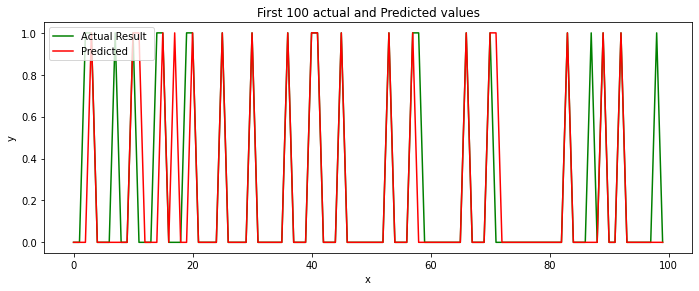

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),predictions[0:100],'r', label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')